In [87]:
import pandas as pd

In [88]:
events = pd.read_csv("events.csv")
categories_trees = pd.read_csv("category_tree.csv")
items_proprieties = pd.read_csv("item_properties_part1.csv")
items_proprieties_2 = pd.read_csv("item_properties_part2.csv")

In [89]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [90]:
Item_Prop = pd.concat([items_proprieties, items_proprieties_2])
Item_Prop.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [91]:
events.shape

(2756101, 5)

In [92]:
categories_trees.shape

(1669, 2)

In [93]:
Item_Prop.shape

(20275902, 4)

#### Data ppreprocessing

In [94]:
events['date_time'] = pd.to_datetime(events['timestamp'], unit='ms')
events['date_time']

0         2015-06-02 05:02:12.117
1         2015-06-02 05:50:14.164
2         2015-06-02 05:13:19.827
3         2015-06-02 05:12:35.914
4         2015-06-02 05:02:17.106
                    ...          
2756096   2015-08-01 03:13:05.939
2756097   2015-08-01 03:30:13.142
2756098   2015-08-01 02:57:00.527
2756099   2015-08-01 03:08:50.703
2756100   2015-08-01 03:36:03.914
Name: date_time, Length: 2756101, dtype: datetime64[ns]

In [95]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


In [96]:
events.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
date_time              0
dtype: int64

In [97]:
event_count=events.event.value_counts()
event_count

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [98]:
event_count=events.event.value_counts()
event_count

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [99]:
# events = events.dropna()
# events.isnull().sum()

In [100]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


In [101]:
event_count=events.event.value_counts()

event_count

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [102]:
events.shape

(2756101, 6)

In [103]:
Item_Prop.isna().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [104]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106


In [105]:
events.groupby('event')['transactionid'].count()

event
addtocart          0
transaction    22457
view               0
Name: transactionid, dtype: int64

In [106]:
events.duplicated().sum()
events = events.drop_duplicates()


In [107]:
event_count=events.event.value_counts()
event_count

event
view           2664218
addtocart        68966
transaction      22457
Name: count, dtype: int64

In [108]:
# verifier combien de fois un client a vu un article avant d'achater
item_transaction = events[['visitorid', 'itemid', 'date_time']][events['event']=='transaction']
# print(item_transaction.head().reset_index())

item_view = events[['visitorid', 'itemid', 'date_time']][events['event']=='view']
# print(item_view.head().reset_index())

#customer add item tocart
item_addtocart =events[['visitorid', 'itemid', 'date_time']][events['event']=='addtocart']
# print(item_transaction.head().reset_index())

In [109]:
# #Checking to see how many visitorid and itemid was foun in all three events
# M_events=item_transaction.merge(item_addtocart, on=['visitorid','itemid'],how ='inner' , suffixes=['(transaction)','(addtocart)'])
# M_events=M_events.merge(item_view, on=['visitorid','itemid'],how ='inner',suffixes =['(view)'])
# M_events=M_events.rename(columns={'date_time' : 'date_time (view)'})
# M_events.head(10)

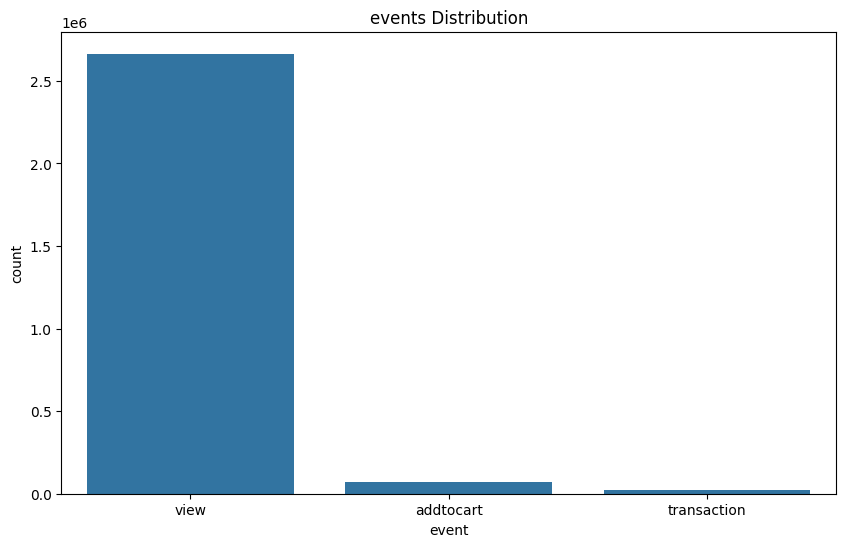

In [110]:
#Event Distribution

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=events, x='event')
plt.title('events Distribution')
plt.show()

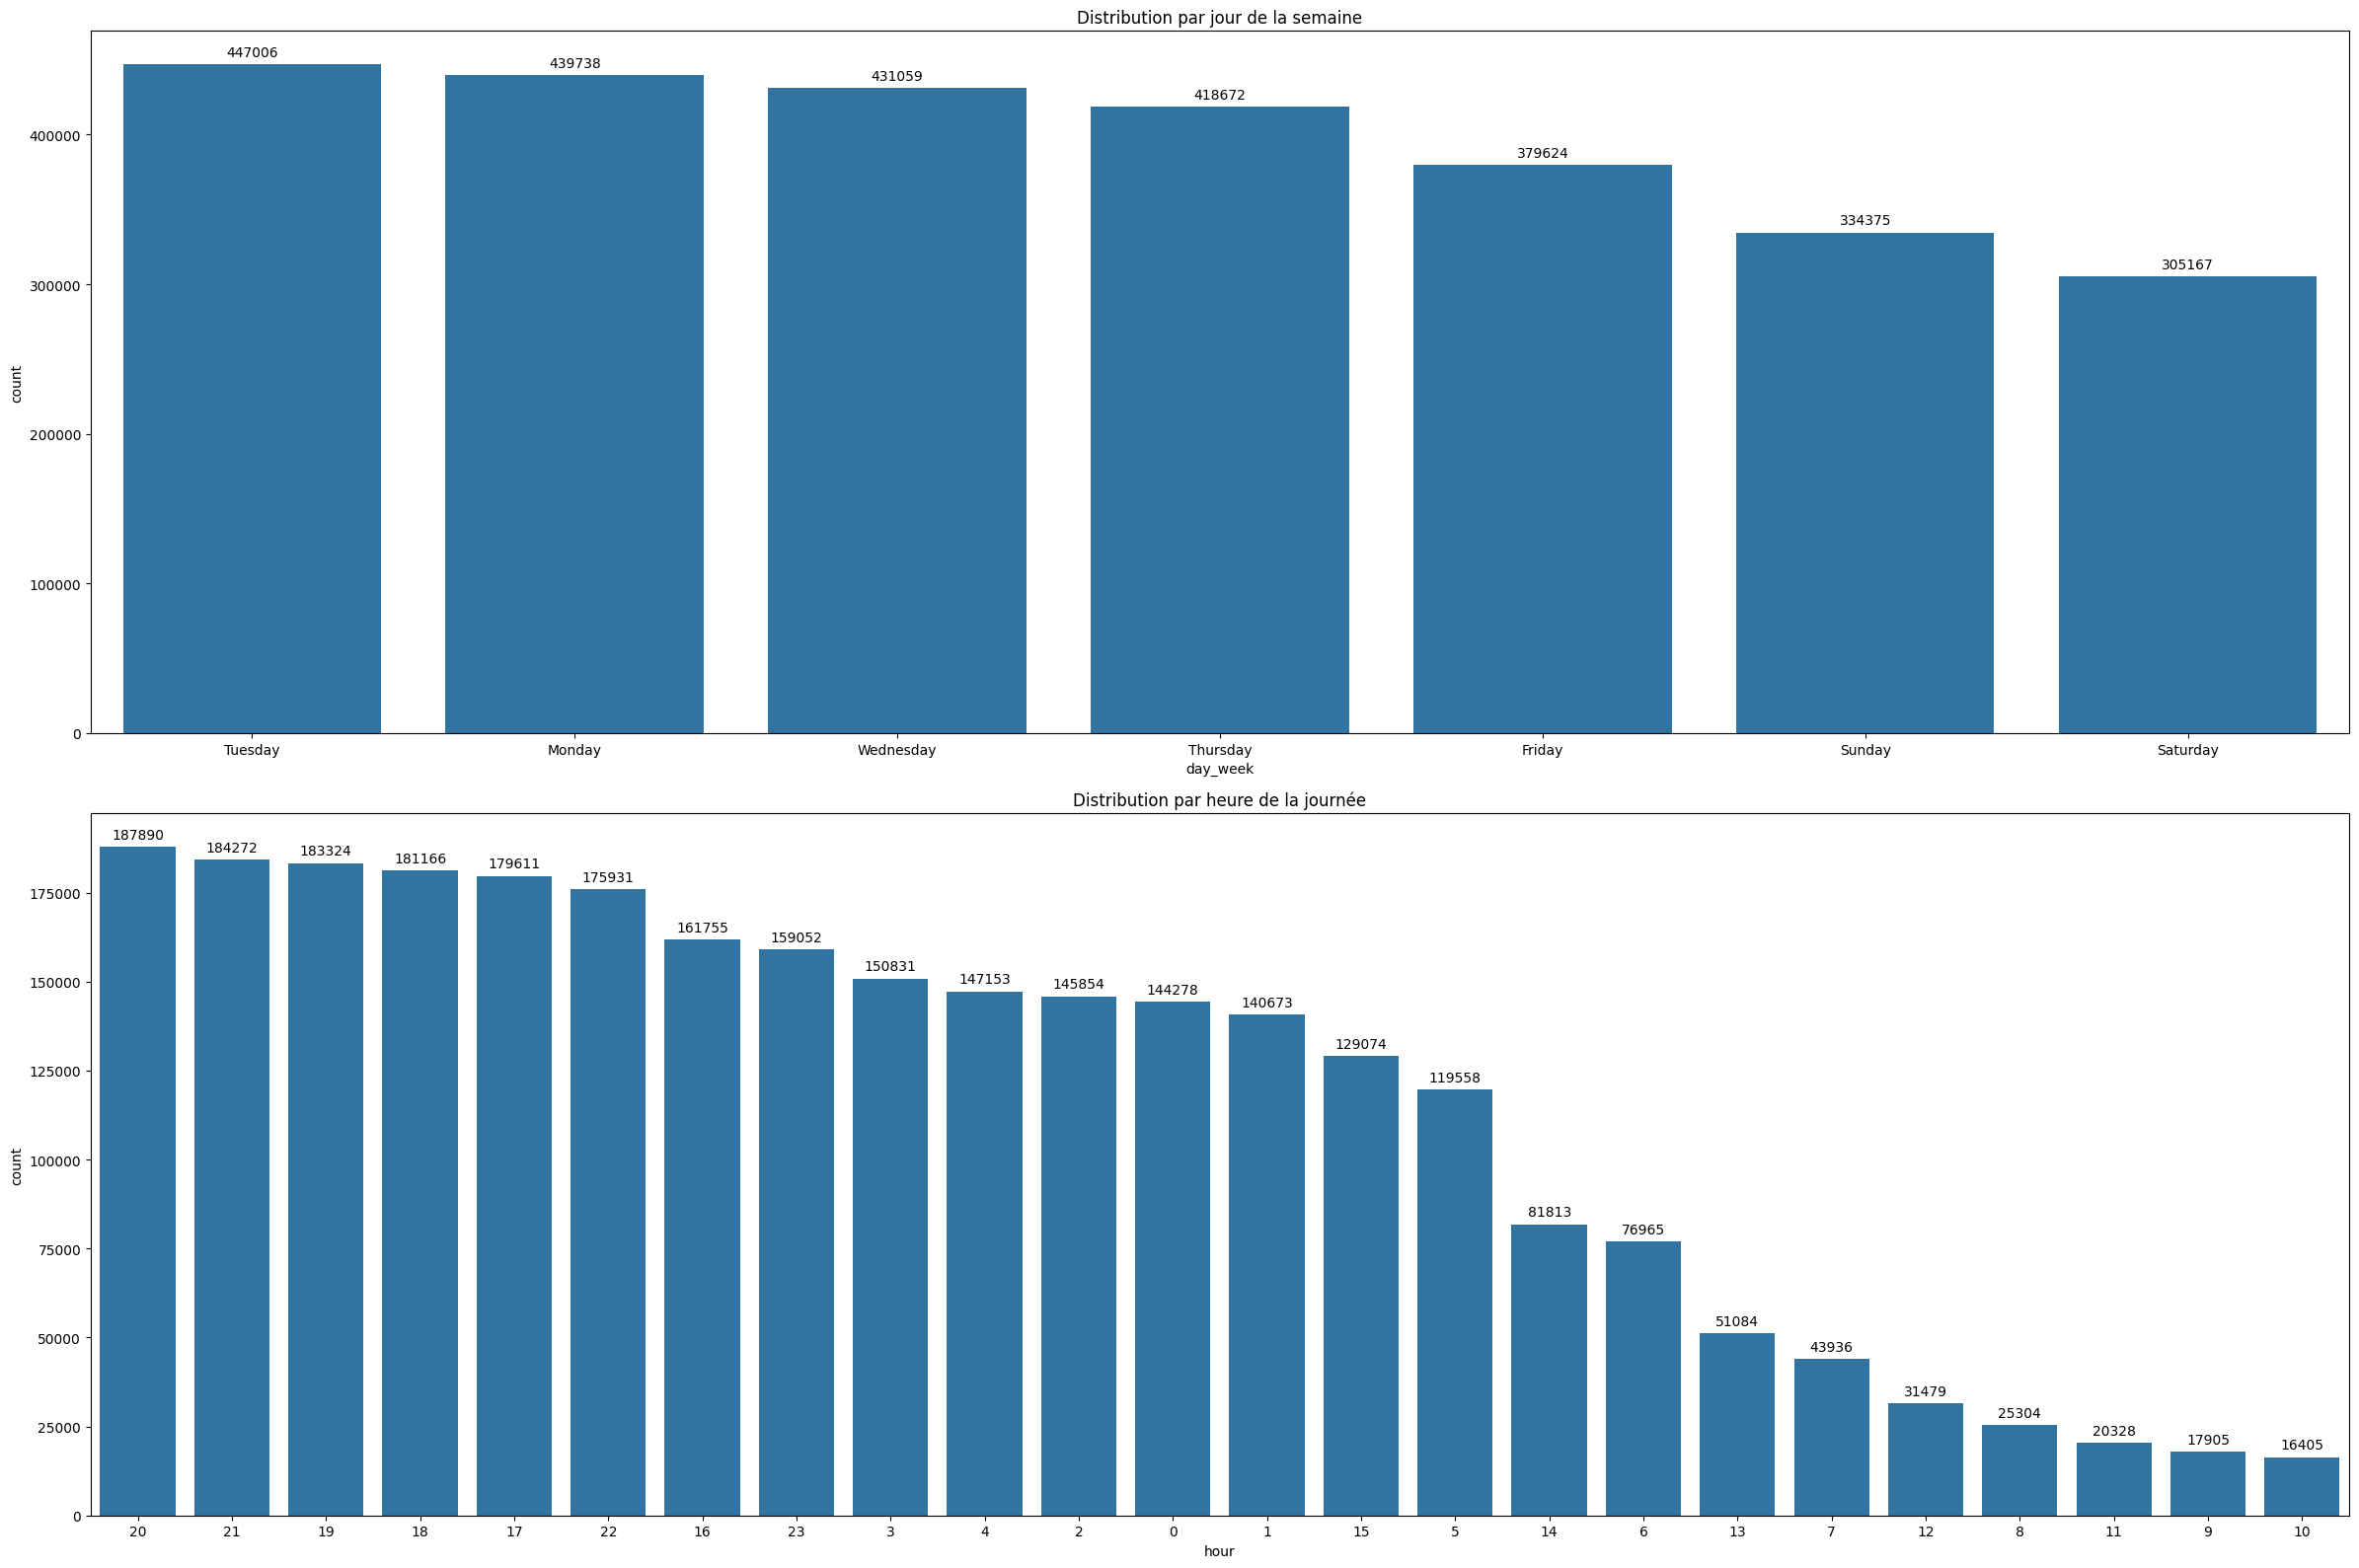

In [111]:
#Distriution des events en {vue} fonction des jours de la semaines et heures des la journée
events['day_week'] = events['date_time'].dt.day_name()
events['hour'] = events['date_time'].dt.hour

plt.figure(figsize=(24, 16))

plt.subplot(2, 1, 1)
ax1 = sns.countplot(data=events, x='day_week', order=events['day_week'].value_counts().index)
plt.title('Distribution par jour de la semaine')
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.subplot(2, 1, 2)
ax2 = sns.countplot(data=events, x='hour', order=events['hour'].value_counts().index)
plt.title('Distribution par heure de la journée')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.tight_layout()
plt.show()

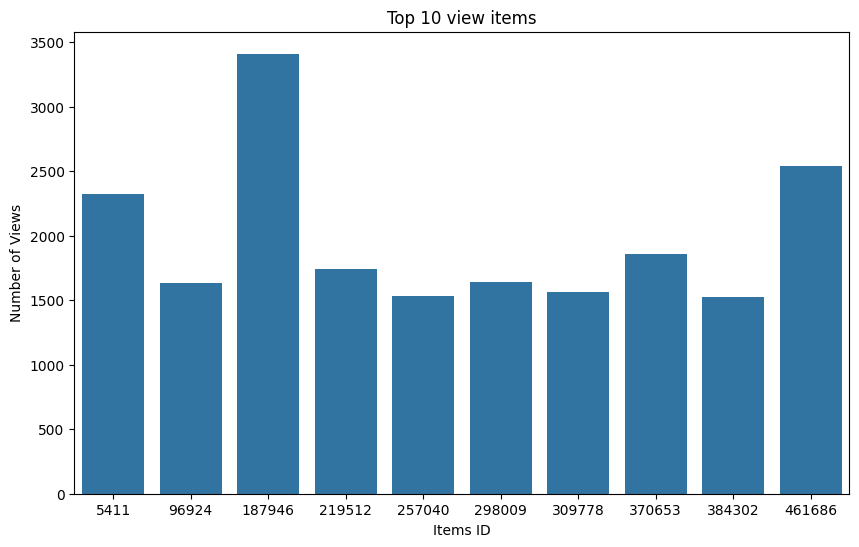

In [112]:
# items les plus vues, top 10
items_top_view = events[events['event'] == 'view']['itemid'].value_counts().head(10)
# print(items_top_view)
plt.figure(figsize=(10, 6))
sns.barplot(x=items_top_view.index, y=items_top_view.values)
plt.title('Top 10 view items')
plt.xlabel('Items ID')
plt.ylabel('Number of Views')
plt.show()

Text(0, 0.5, 'number of event')

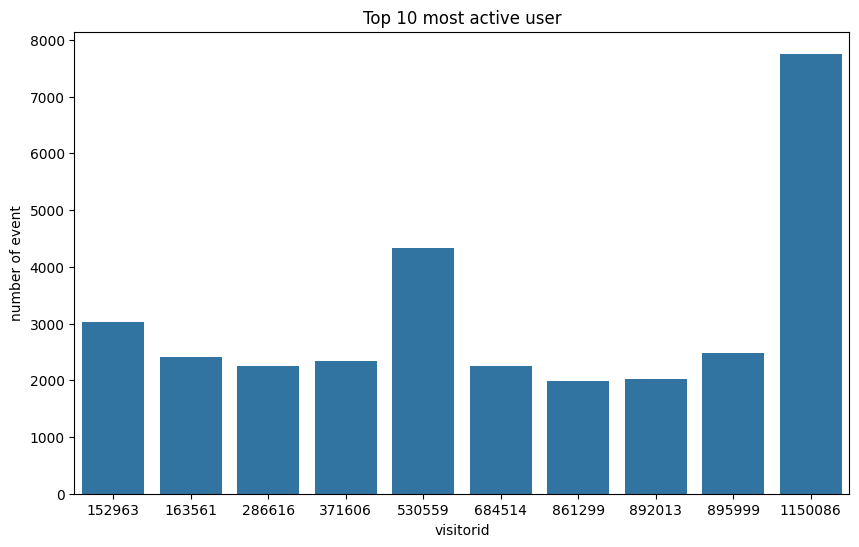

In [113]:
#most Active users
top_active_user=events['visitorid'].value_counts().head(10)
# print(top_active_user)
plt.figure(figsize=(10,6))
sns.barplot(x=top_active_user.index,y=top_active_user.values)
plt.title('Top 10 most active user')
plt.xlabel('visitorid')
plt.ylabel('number of event')

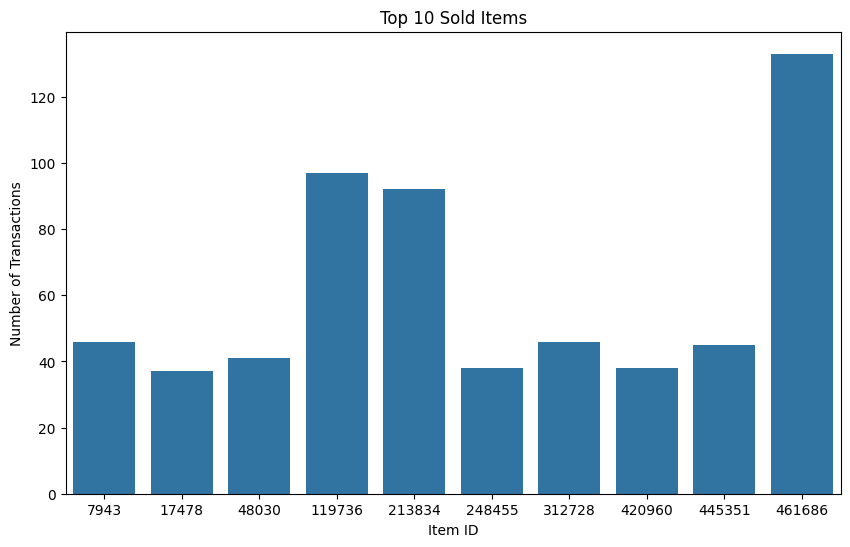

In [114]:
#  Top items by transactions
top_sold_items = events[events['event'] == 'transaction']['itemid'].value_counts().head(10)
# print(top_sold_items)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sold_items.index, y=top_sold_items.values)
plt.title('Top 10 Sold Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Transactions')
plt.show()

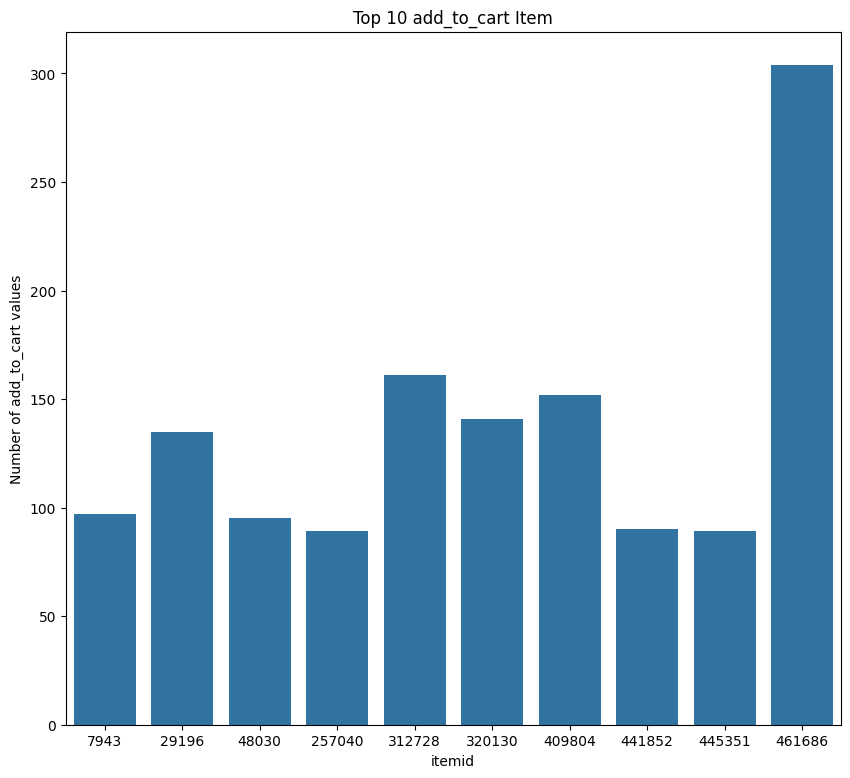

In [115]:
# article les plus souvent ajoutés au panier
top_addtocart_item =events[events['event']=='addtocart']['itemid'].value_counts().head(10)
# print(top_addtocart_item)
plt.figure(figsize=(10,9))
sns.barplot(x=top_addtocart_item.index ,y =top_addtocart_item.values)
plt.title('Top 10 add_to_cart Item')
plt.xlabel('itemid')
plt.ylabel('Number of add_to_cart values')
plt.show()

In [116]:
#Groouping by visitor Id
events.groupby('event')['visitorid'].count()

event
addtocart        68966
transaction      22457
view           2664218
Name: visitorid, dtype: int64

In [117]:
categories_trees.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [118]:
events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,day_week,hour
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,Tuesday,5
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,Tuesday,5
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,Tuesday,5
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,Tuesday,5
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,Tuesday,5


In [119]:
Item_Prop.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [120]:
## merge events to items properties
merged_events = events.merge(Item_Prop,on=['itemid','timestamp'],how='left')
merged_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,day_week,hour,property,value
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,Tuesday,5,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,Tuesday,5,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,Tuesday,5,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,Tuesday,5,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,Tuesday,5,NaN,NaN


In [121]:
events['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [122]:
categories_trees.isnull().sum()
categories_trees = categories_trees.dropna()
categories_trees['parentid'].fillna(0)
categories_trees.duplicated().sum()
categories_trees = categories_trees.drop_duplicates()

In [123]:
merged_events=merged_events.merge(categories_trees, left_on='property', right_on='categoryid', how='left')
merged_events.head()

,timestamp,visitorid,event,itemid,transactionid,date_time,day_week,hour,property,value,categoryid,parentid
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,Tuesday,5,NaN,NaN,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,Tuesday,5,NaN,NaN,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,Tuesday,5,NaN,NaN,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,Tuesday,5,NaN,NaN,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,Tuesday,5,NaN,NaN,NaN,NaN


   visitorid  itemid  property  parentid
0          0       3         0         0
1          1       1         0         0
2          2       8         0         0
3          3       1         0         0
4          4       1         0         0
          itemid  property  parentid
itemid       1.0       NaN       NaN
property     NaN       NaN       NaN
parentid     NaN       NaN       NaN


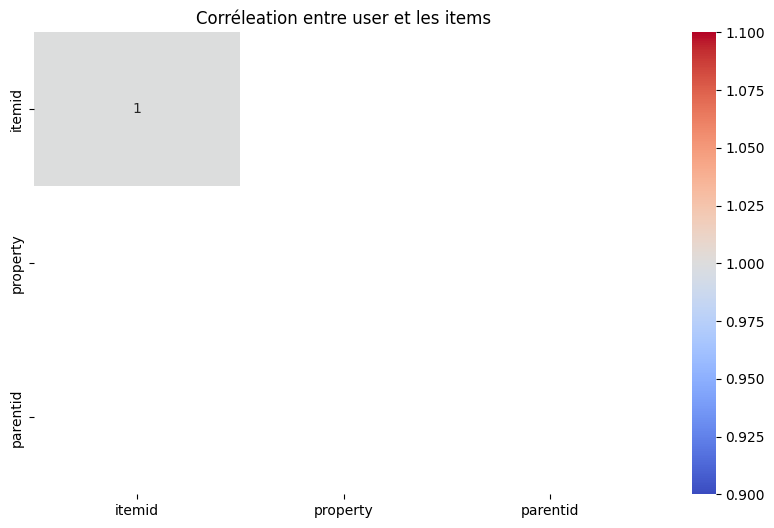

In [124]:
#Correlation between user attributes and item attributes
user_item_merged = merged_events.groupby('visitorid').agg({
    'itemid': 'count',
    'property': 'nunique',
    'parentid': 'nunique',
})
print(user_item_merged.head().reset_index())

correlation_matrix = user_item_merged.corr()
print(correlation_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot =True,cmap ='coolwarm')
plt.title('Corréleation entre user et les items')
plt.show()

In [125]:
add_to_cart = events[events['event'] == 'addtocart']
# print(add_to_cart)
transactions = events[events['event'] == 'transaction']
conversion_rate = len(transactions) / len(add_to_cart)

print(f"Add-to-cart to transaction conversion rate: {conversion_rate:.2%}")

Add-to-cart to transaction conversion rate: 32.56%


In [126]:
categories_trees

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [127]:
categories_trees['categoryid'].nunique()

1644

In [128]:
items_proprieties.isnull().sum()
items_proprieties['value'].fillna("Inconnu")
items_proprieties.duplicated().sum()
items_proprieties = items_proprieties.drop_duplicates()


In [129]:
items_proprieties.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [130]:
properties = items_proprieties['property'].value_counts()
properties

property
888           1629817
790            970800
available      817387
categoryid     426305
6              343207
               ...   
782                 1
288                 1
427                 1
471                 1
712                 1
Name: count, Length: 1097, dtype: int64

In [131]:
merged_events

,timestamp,visitorid,event,itemid,transactionid,date_time,day_week,hour,property,value,categoryid,parentid
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,Tuesday,5,NaN,NaN,NaN,NaN
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,Tuesday,5,NaN,NaN,NaN,NaN
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,Tuesday,5,NaN,NaN,NaN,NaN
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,Tuesday,5,NaN,NaN,NaN,NaN
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,Tuesday,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2755636,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,Saturday,3,NaN,NaN,NaN,NaN
2755637,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,Saturday,3,NaN,NaN,NaN,NaN
2755638,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,Saturday,2,NaN,NaN,NaN,NaN
2755639,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,Saturday,3,NaN,NaN,NaN,NaN


In [132]:
merged_events.shape

(2755641, 12)

In [133]:
#taking a sample from the dataframe
import numpy as np
np.random.seed(1)

rows_to_keep = np.random.choice(merged_events.index, size=50000, replace=False)
sample_df = merged_events.loc[rows_to_keep]

sample_df

,timestamp,visitorid,event,itemid,transactionid,date_time,day_week,hour,property,value,categoryid,parentid
1502186,1430801768576,1163548,view,182851,NaN,2015-05-05 04:56:08.576,Tuesday,4,NaN,NaN,NaN,NaN
547399,1435378506816,519492,view,287287,NaN,2015-06-27 04:15:06.816,Saturday,4,NaN,NaN,NaN,NaN
2152452,1436078633332,532358,view,347081,NaN,2015-07-05 06:43:53.332,Sunday,6,NaN,NaN,NaN,NaN
1508392,1430851366672,1394708,view,354881,NaN,2015-05-05 18:42:46.672,Tuesday,18,NaN,NaN,NaN,NaN
628172,1438579567615,1174103,view,78887,NaN,2015-08-03 05:26:07.615,Monday,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2627049,1437942859547,390245,view,157810,NaN,2015-07-26 20:34:19.547,Sunday,20,NaN,NaN,NaN,NaN
551350,1435541287711,366059,view,242188,NaN,2015-06-29 01:28:07.711,Monday,1,NaN,NaN,NaN,NaN
2614158,1437860891796,582362,view,60411,NaN,2015-07-25 21:48:11.796,Saturday,21,NaN,NaN,NaN,NaN
2471796,1437446298127,990173,view,341937,NaN,2015-07-21 02:38:18.127,Tuesday,2,NaN,NaN,NaN,NaN


 ## Feature engineering 

In [134]:
#user_based Feature
compo_user = sample_df.groupby('visitorid').agg({
    'itemid':'count',
    'property': 'nunique',
    'parentid':'nunique',
    'timestamp': ['min' ,'max','mean']
}).reset_index()

compo_user.columns = ['visitorid', 'item_count', 'property_count', 'category_count', 'first_interaction', 'last_interaction', 'avg_interaction_time']
compo_user['time_on_platform'] = compo_user['last_interaction'] - compo_user['first_interaction']
compo_user['time_between_actions'] = compo_user['time_on_platform'] / (compo_user['item_count'] - 1)

compo_user.head(10)

,visitorid,item_count,property_count,category_count,first_interaction,last_interaction,avg_interaction_time,time_on_platform,time_between_actions
0,6,1,0,0,1440914628202,1440914628202,1.440915e+12,0,NaN
1,149,1,0,0,1434918127434,1434918127434,1.434918e+12,0,NaN
2,150,1,0,0,1433719740599,1433719740599,1.433720e+12,0,NaN
3,155,1,0,0,1442032680026,1442032680026,1.442033e+12,0,NaN
4,162,1,0,0,1433387830127,1433387830127,1.433388e+12,0,NaN
5,172,1,0,0,1436849713821,1436849713821,1.436850e+12,0,NaN
6,239,1,0,0,1431549497704,1431549497704,1.431549e+12,0,NaN
7,318,1,0,0,1435607785773,1435607785773,1.435608e+12,0,NaN
8,335,1,0,0,1439674005272,1439674005272,1.439674e+12,0,NaN
9,351,1,0,0,1442215689842,1442215689842,1.442216e+12,0,NaN


In [135]:
#item_based feature
item_popularity = sample_df.groupby('itemid').agg({
    'visitorid':'count',
     'event': ['nunique',lambda  x : sum(x == 'view'),
              lambda x:sum(x =='addtocart'),
              lambda x:sum(x =='transaction')]
   }).reset_index()

item_popularity.columns=['itemid','user_count','event_count','view_count','addtocart_count','transaction_count']
item_popularity['conversion rate'] = item_popularity['transaction_count']/item_popularity['addtocart_count']
item_popularity.head(10)

,itemid,user_count,event_count,view_count,addtocart_count,transaction_count,conversion rate
0,3,1,1,1,0,0,NaN
1,15,1,1,0,1,0,0.0
2,19,2,1,2,0,0,NaN
3,32,2,1,2,0,0,NaN
4,46,1,1,1,0,0,NaN
5,61,1,1,1,0,0,NaN
6,66,1,1,1,0,0,NaN
7,117,1,1,1,0,0,NaN
8,134,1,1,1,0,0,NaN
9,151,1,1,1,0,0,NaN


In [136]:
#user_item interaction feature
user_item_interaction = sample_df.groupby(['visitorid' ,'itemid']).agg({
    'event':'count',
    'timestamp' : ['min' ,'max']
    }).reset_index()
user_item_interaction

visitorid  itemid event      timestamp               
                        count            min            max
0             6   65273     1  1440914628202  1440914628202
1           149  332620     1  1434918127434  1434918127434
2           150  452955     1  1433719740599  1433719740599
3           155  389974     1  1442032680026  1442032680026
4           162    1152     1  1433387830127  1433387830127
...         ...     ...   ...            ...            ...
49432   1407479  397424     1  1434517877607  1434517877607
49433   1407479  427472     1  1434517715921  1434517715921
49434   1407491  445239     1  1441657541978  1441657541978
49435   1407530  455539     1  1437964161007  1437964161007
49436   1407564  360760     1  1436034327075  1436034327075

[49437 rows x 5 columns]

In [137]:
user_item_interaction.columns =['visitorid','itemid' ,'interaction_count','first_interaction','last_interaction']
user_item_interaction['time_between_interaction'] = user_item_interaction['last_interaction'] -user_item_interaction['first_interaction']
user_item_interaction

,visitorid,itemid,interaction_count,first_interaction,last_interaction,time_between_interaction
0,6,65273,1,1440914628202,1440914628202,0
1,149,332620,1,1434918127434,1434918127434,0
2,150,452955,1,1433719740599,1433719740599,0
3,155,389974,1,1442032680026,1442032680026,0
4,162,1152,1,1433387830127,1433387830127,0
...,...,...,...,...,...,...
49432,1407479,397424,1,1434517877607,1434517877607,0
49433,1407479,427472,1,1434517715921,1434517715921,0
49434,1407491,445239,1,1441657541978,1441657541978,0
49435,1407530,455539,1,1437964161007,1437964161007,0


In [138]:
user_feature=compo_user.drop(['first_interaction' ,'last_interaction'],axis=1)
item_feature=item_popularity.drop(['view_count','addtocart_count','transaction_count'],axis=1)
user_item_interaction_feature=user_item_interaction.drop(['first_interaction','last_interaction'],axis=1)

#merge the feature into single dataframe, preparing features for a machine learning model by combining information from different DataFrames 

features=user_item_interaction_feature.merge(user_feature,on ='visitorid').merge(item_feature, on ='itemid')

In [139]:
# Replace infinity values with NaN
features=features.replace([np.inf,-np.inf],np.nan)

# Fill NaN values with the median
features=features.fillna(features.median())
features.head(10)

,visitorid,itemid,interaction_count,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
0,6,65273,1,0,1,0,0,1.440915e+12,0,8.552107e+07,19,2,0.0
1,149,332620,1,0,1,0,0,1.434918e+12,0,8.552107e+07,2,1,0.0
2,150,452955,1,0,1,0,0,1.433720e+12,0,8.552107e+07,2,1,0.0
3,155,389974,1,0,1,0,0,1.442033e+12,0,8.552107e+07,1,1,0.0
4,162,1152,1,0,1,0,0,1.433388e+12,0,8.552107e+07,4,1,0.0
5,172,374400,1,0,1,0,0,1.436850e+12,0,8.552107e+07,3,1,0.0
6,239,345095,1,0,1,0,0,1.431549e+12,0,8.552107e+07,3,1,0.0
7,318,133814,1,0,1,0,0,1.435608e+12,0,8.552107e+07,18,2,0.0
8,335,400946,1,0,1,0,0,1.439674e+12,0,8.552107e+07,18,1,0.0
9,351,98547,1,0,1,0,0,1.442216e+12,0,8.552107e+07,6,1,0.0


In [140]:
from surprise import Dataset, Reader, SVD 
from surprise.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from surprise.accuracy import rmse 

scaler = MinMaxScaler()
features[['interaction_count', 'avg_interaction_time', 'time_on_platform']] = scaler.fit_transform(
    features[['interaction_count', 'avg_interaction_time', 'time_on_platform']]
)
features = features[features['interaction_count'] > 0]

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(features[['visitorid', 'itemid', 'interaction_count']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
model = SVD()
model.fit(trainset)
predictions = model.test(testset)
print("RMSE :", rmse(predictions))

RMSE: 0.1048
RMSE : 0.10480466959379452


In [141]:
from surprise.model_selection import GridSearchCV
hyper_param = {
    'n_factors': [50, 100, 150],
    'n_epochs': [20, 30, 40],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

grid_search_train = GridSearchCV(SVD, hyper_param, measures=['rmse'], cv=3)
grid_search_train.fit(data)

In [142]:
print("Meilleurs paramètres : ", grid_search_train.best_params['rmse'])

Meilleurs paramètres :  {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.1}


In [143]:
best_model = SVD(n_factors=grid_search_train.best_params['rmse']['n_factors'],
                 n_epochs=grid_search_train.best_params['rmse']['n_epochs'],
                 lr_all=grid_search_train.best_params['rmse']['lr_all'],
                 reg_all=grid_search_train.best_params['rmse']['reg_all'])

best_model.fit(trainset)

In [144]:
best_pred = best_model.test(testset)
print("RMSE Optimisé :", rmse(best_pred))

RMSE: 0.1050
RMSE Optimisé : 0.10496337490397861


In [145]:
import pickle
with open('collab_best_model_new.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [146]:
import pickle
with open('collab_best_model_new.pkl', 'rb') as f:
    svd_model = pickle.load(f)
prediction = svd_model.predict(1, 67045)
print("Prediction:", prediction.est)

Prediction: 0.19230769230769232


In [147]:
print(features['interaction_count'].describe())
print(features['interaction_count'].value_counts())


count    488.000000
mean       0.192281
std        0.092951
min        0.166667
25%        0.166667
50%        0.166667
75%        0.166667
max        1.000000
Name: interaction_count, dtype: float64
interaction_count
0.166667    442
0.333333     28
0.500000     10
0.666667      6
0.833333      1
1.000000      1
Name: count, dtype: int64


In [148]:
features['itemid']

58        93761
65       445559
229      268049
230      431417
382      409498
          ...  
48264    316753
48444     88453
48471    340749
48740    391917
48857      8497
Name: itemid, Length: 488, dtype: int64

In [149]:
## predict recommend for a visitor (user)
visitor_id = 1227253
top_n = 10
predictions = [model.predict(visitor_id, item_id) for item_id in features['itemid'].unique()]
recommand_prod = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]
print("Produits recommandés :", [rec.iid for rec in recommand_prod])

Produits recommandés : [20388, 135446, 53151, 412905, 240088, 263692, 7943, 89893, 354753, 357949]


In [150]:
features.to_csv('features_svd_new.csv', index=False)

In [151]:
df=pd.read_csv('features_svd_new.csv')

In [152]:
# Prédiction pour utilisateur
user_id = 1227253
top_n = 10
predictions = [best_model.predict(user_id, item_id) for item_id in df['itemid'].unique()]
recommand_prod = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]
print("Produits recommandés :", [rec.iid for rec in recommand_prod])

Produits recommandés : [20388, 412905, 53151, 263692, 7943, 354753, 60980, 178451, 89893, 457464]


### Content Base filtering


In [153]:
features.head()

,visitorid,itemid,interaction_count,time_between_interaction,item_count,property_count,category_count,avg_interaction_time,time_on_platform,time_between_actions,user_count,event_count,conversion rate
58,1879,93761,0.166667,295119,7,0,0,0.572026,0.519930,9.946169e+08,5,1,0.0
65,2019,445559,0.166667,51288610,2,0,0,0.228097,0.004468,5.128861e+07,3,1,0.0
229,6958,268049,0.166667,56606,4,0,0,0.476130,0.033385,1.277290e+08,2,1,0.0
230,6958,431417,0.166667,538735,4,0,0,0.476130,0.033385,1.277290e+08,2,1,0.0
382,11926,409498,0.166667,76264563,2,0,0,0.378071,0.006644,7.626456e+07,2,1,0.0


In [154]:
base_cont_df = features[['itemid', 'item_count', 'avg_interaction_time', 'time_on_platform']].drop_duplicates()

base_cont_df

,itemid,item_count,avg_interaction_time,time_on_platform
58,93761,7,0.572026,0.519930
65,445559,2,0.228097,0.004468
229,268049,4,0.476130,0.033385
230,431417,4,0.476130,0.033385
382,409498,2,0.378071,0.006644
...,...,...,...,...
48264,316753,2,0.417867,0.000002
48444,88453,2,0.036483,0.000741
48471,340749,3,0.316715,0.015044
48740,391917,2,0.174778,0.000022


In [155]:
print(base_cont_df[['item_count', 'avg_interaction_time', 'time_on_platform']].describe())


       item_count  avg_interaction_time  time_on_platform
count  488.000000            488.000000      4.880000e+02
mean     4.422131              0.453622      8.609871e-02
std     10.481728              0.267224      1.719964e-01
min      2.000000              0.000190      2.700844e-09
25%      2.000000              0.230522      4.956777e-05
50%      2.000000              0.423203      7.425500e-03
75%      3.000000              0.671044      7.760512e-02
max     98.000000              0.999596      9.765575e-01


In [156]:
base_cont_df['item_count'] = base_cont_df['item_count'].astype('float32')
base_cont_df['avg_interaction_time'] = base_cont_df['avg_interaction_time'].astype('float32')
base_cont_df['time_on_platform'] = base_cont_df['time_on_platform'].astype('float32')

In [157]:
base_cont_df

,itemid,item_count,avg_interaction_time,time_on_platform
58,93761,7.0,0.572026,0.519930
65,445559,2.0,0.228097,0.004468
229,268049,4.0,0.476130,0.033385
230,431417,4.0,0.476130,0.033385
382,409498,2.0,0.378071,0.006644
...,...,...,...,...
48264,316753,2.0,0.417867,0.000002
48444,88453,2.0,0.036483,0.000741
48471,340749,3.0,0.316715,0.015044
48740,391917,2.0,0.174778,0.000022


In [158]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
import pandas as pd
from scipy.sparse import save_npz

base_cont_df = base_cont_df.dropna(subset=['item_count', 'avg_interaction_time', 'time_on_platform'])

base_cont_df = base_cont_df[base_cont_df['item_count'] > 1]

scaler = MinMaxScaler()
normal_fix = ['item_count', 'avg_interaction_time', 'time_on_platform']
scalezed=scaler.fit_transform(base_cont_df[normal_fix])
normaliz_features_df = pd.DataFrame(
    scalezed,
    index=base_cont_df['itemid'],
    columns=normal_fix
)
sparse_features = csr_matrix(normaliz_features_df.values)
similarity_matrix = cosine_similarity(sparse_features, dense_output=False)
print(f"Matrice de similarité {similarity_matrix.shape}")

save_npz('similarity_matrix_npz.npz', similarity_matrix)


Matrice de similarité (488, 488)


In [159]:
sparse_features

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1124 stored elements and shape (488, 3)>

In [160]:
similary_matrice_to_df = pd.DataFrame(similarity_matrix.toarray(), index=base_cont_df.index, columns=base_cont_df.index)
similary_matrice_to_df.to_csv('similarity_matrix_df_new.csv', index=True)
print("La matrice de similarité a été enregistrée dans 'similarity_matrix_df_new.csv'")

La matrice de similarité a été enregistrée dans 'similarity_matrix_df_new.csv'


In [161]:
normaliz_features_df

,item_count,avg_interaction_time,time_on_platform
itemid,,,
93761,0.052083,0.572176,0.532411
445559,0.000000,0.228042,0.004576
268049,0.020833,0.476223,0.034186
431417,0.020833,0.476223,0.034186
409498,0.000000,0.378106,0.006804
...,...,...,...
316753,0.000000,0.417925,0.000002
88453,0.000000,0.036315,0.000759
340749,0.010417,0.316714,0.015405


In [162]:
normaliz_features_df.to_csv('base_cont_df.csv')

In [163]:
# base_cont_df

In [164]:
def find_articles(item_id, similarity_matrix, normaliz_features):
    if item_id not in normaliz_features.index:
        return f"Item {item_id} not found "

    item_index = normaliz_features.index.get_loc(item_id)
    indice_similaire = np.argsort(-similarity_matrix[item_index].toarray().flatten())[1:11]
    
    indice_similaire = [i for i in indice_similaire if i < len(normaliz_features.index)]
    similar_items = [normaliz_features.index[i] for i in indice_similaire]
    return similar_items

item_id = 175292
similar_articles = find_articles(item_id, similarity_matrix, normaliz_features_df)
print(f"Articles similaires à {item_id} : {similar_articles}")



Articles similaires à 175292 : Item 175292 not found 


In [165]:
items_id = [175292, 381314, 312728]
for item_id in items_id:
    print(f"Articles similaires à {item_id} : {find_articles(item_id, similarity_matrix, normaliz_features_df)}")


Articles similaires à 175292 : Item 175292 not found 
Articles similaires à 381314 : Item 381314 not found 
Articles similaires à 312728 : [162139, 291877, 93761, 98899, 462188, 442159, 81554, 221329, 292072, 135446]


In [166]:
for i in range(5):
    print(f"Similarités pour l'article index {i} : {similarity_matrix[i].toarray().flatten()}")

Similarités pour l'article index 0 : [1.         0.74395657 0.7794207  0.7794207  0.7425788  0.76732373
 0.9497904  0.90772986 0.96918744 0.81229585 0.72779554 0.89227873
 0.9816984  0.8595561  0.75090927 0.84243345 0.67341316 0.8575031
 0.730477   0.7928215  0.73210186 0.7945217  0.8582529  0.7423305
 0.7310351  0.73047304 0.92723334 0.7371794  0.9831877  0.771741
 0.73108727 0.7304722  0.93690807 0.9324576  0.85490716 0.5693808
 0.90006375 0.73048186 0.9895278  0.7306959  0.99846417 0.7336429
 0.73106945 0.7307145  0.7305294  0.75286984 0.754882   0.7307811
 0.78533006 0.7347381  0.73413295 0.7368721  0.76147497 0.73063946
 0.98656106 0.7305278  0.73058665 0.7616003  0.73051924 0.9531683
 0.93097275 0.93359643 0.7806224  0.97336054 0.78711116 0.73047096
 0.8163224  0.73213166 0.7305048  0.7305731  0.8555605  0.98726106
 0.73829055 0.7515532  0.76546395 0.7380061  0.84758914 0.80622476
 0.7305683  0.7305254  0.9327439  0.8298634  0.99278224 0.7311104
 0.8680134  0.81283075 0.8575292  